<a href="https://colab.research.google.com/github/ElizabethHuallpa/alura-store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



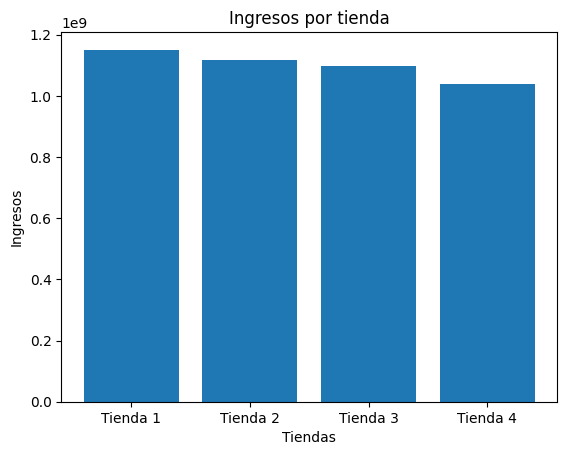

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


In [ ]:
#Ingresos por tienda
tiendas = [tienda1, tienda2, tienda3, tienda4]
ingresos_totales = [float(t['Precio'].sum()) for t in tiendas]

#Gráfico de los ingresos por tienda
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], ingresos_totales)
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por tienda')
plt.show()

print(ingresos_totales)

#2. Categoría más vendida por tienda


{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, 'Tienda 4': Categoría del Producto
Muebles                    480
Ele

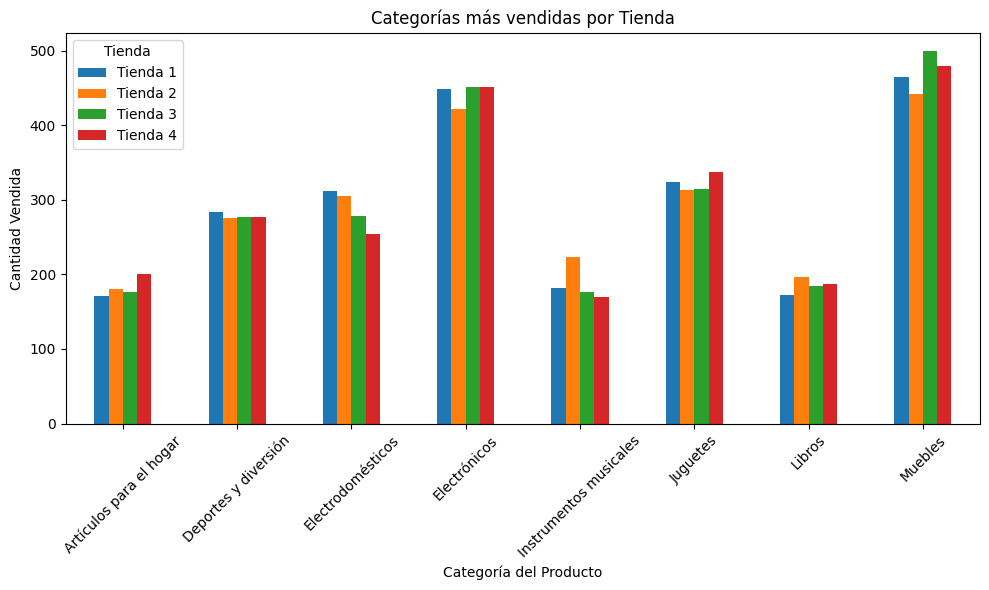

In [ ]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Categoría más vendida por tienda
categorias_por_tienda = {
    nombre: tienda['Categoría del Producto'].value_counts()
    for nombre, tienda in zip(nombres_tiendas, tiendas)
}

print(categorias_por_tienda)

df_categorias = pd.DataFrame(categorias_por_tienda).fillna(0)  # Rellenar NaN con 0
df_categorias = df_categorias.astype(int)

# Transponer si prefieres ver tiendas en el eje X
df_categorias.plot(kind='bar', figsize=(10, 6))
plt.title('Categorías más vendidas por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

#3. Promedio de evaluación de los clientes

{'Tienda 1': np.float64(3.98), 'Tienda 2': np.float64(4.04), 'Tienda 3': np.float64(4.05), 'Tienda 4': np.float64(4.0)}


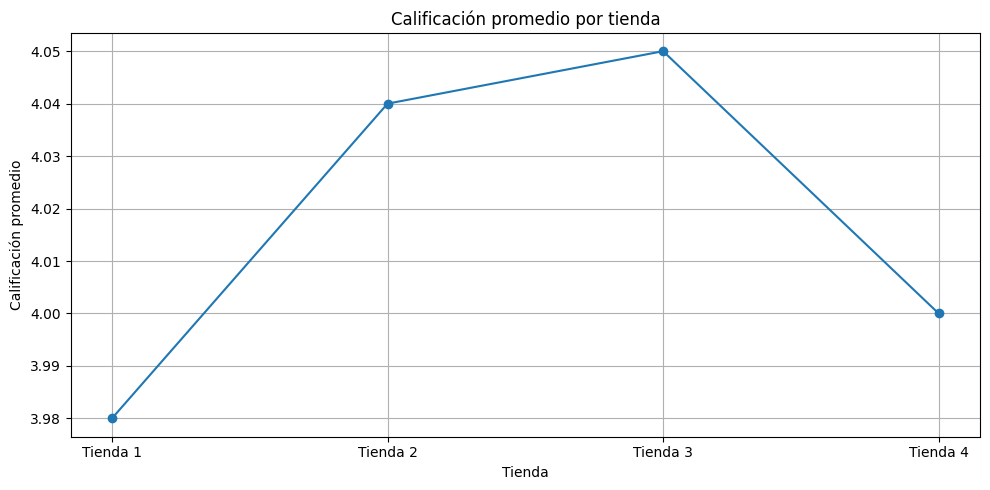

In [ ]:
# Promedio de evaluación de los clientes
calificacion_por_tienda = {
    nombre: round(tienda['Calificación'].mean(), 2)
    for nombre, tienda in zip(nombres_tiendas, tiendas)
}

print(calificacion_por_tienda)

# Convertir el diccionario en un DataFrame
df_calificacion = pd.DataFrame.from_dict(calificacion_por_tienda, orient='index', columns=['Calificación'])

# Resetear índice para tener las tiendas como columna
df_calificacion = df_calificacion.reset_index().rename(columns={'index': 'Tienda'})

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(df_calificacion['Tienda'], df_calificacion['Calificación'], marker='o', linestyle='-')

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

{'Tienda 1': {'Más vendido': 'Microondas', 'cantidad': 60}, 'Tienda 2': {'Más vendido': 'Iniciando en programación', 'cantidad': 65}, 'Tienda 3': {'Más vendido': 'Kit de bancas', 'cantidad': 57}, 'Tienda 4': {'Más vendido': 'Cama box', 'cantidad': 62}}
{'Tienda 1': {'Menos vendido': 'Auriculares con micrófono', 'cantidad': 33}, 'Tienda 2': {'Menos vendido': 'Juego de mesa', 'cantidad': 32}, 'Tienda 3': {'Menos vendido': 'Bloques de construcción', 'cantidad': 35}, 'Tienda 4': {'Menos vendido': 'Guitarra eléctrica', 'cantidad': 33}}


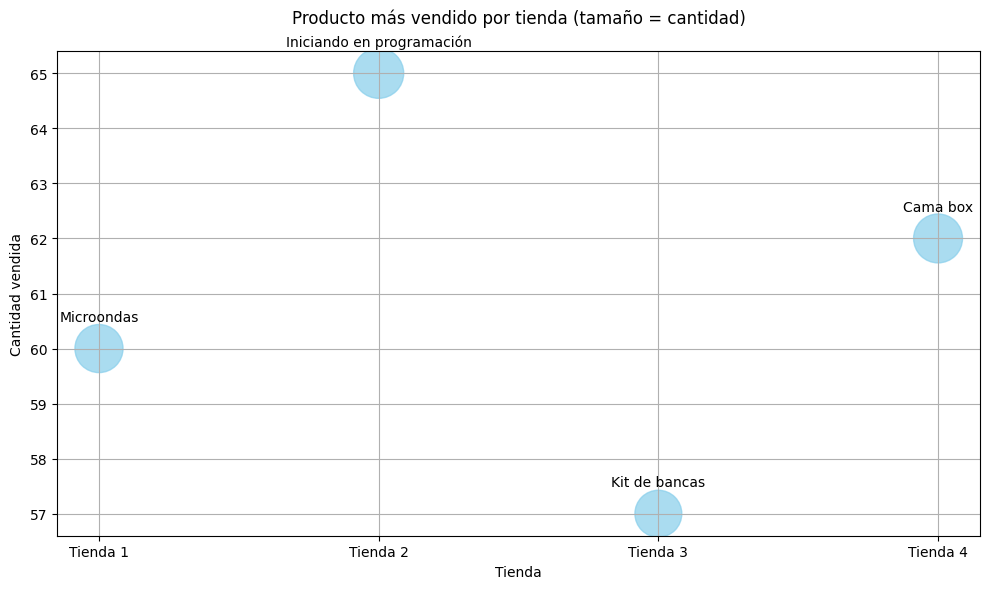

In [ ]:
# Base de datos de tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Diccionario para guardar resultados
mas_vendidos_por_tienda = {}
menos_vendidos_por_tienda = {}

# Recorrer cada tienda y encontrar el producto más vendido
for nombre, tienda in zip(nombres_tiendas, tiendas):
    producto_mas_vendido = tienda['Producto'].value_counts().idxmax()
    cantidad_mas_vendido = tienda['Producto'].value_counts().max()
    producto_menos_vendio = tienda['Producto'].value_counts().idxmin()
    cantidad_menos_vendio = tienda['Producto'].value_counts().min()
    mas_vendidos_por_tienda[nombre] = {'Más vendido': producto_mas_vendido, 'cantidad': cantidad_mas_vendido}
    menos_vendidos_por_tienda[nombre] = {'Menos vendido': producto_menos_vendio, 'cantidad': cantidad_menos_vendio}

# Mostrar el diccionario
print(mas_vendidos_por_tienda)
print(menos_vendidos_por_tienda)

# Convertir diccionario a DataFrame
df = pd.DataFrame.from_dict(mas_vendidos_por_tienda, orient='index')
df = df.reset_index().rename(columns={'index': 'Tienda'})

# Gráfico de burbujas
plt.figure(figsize=(10, 6))
plt.scatter(df['Tienda'], df['cantidad'], s=df['cantidad']*20, c='skyblue', alpha=0.7)

for i in range(len(df)):
    plt.text(df['Tienda'][i], df['cantidad'][i]+0.5, df['Más vendido'][i], ha='center')

plt.title('Producto más vendido por tienda (tamaño = cantidad)', pad =20)
plt.xlabel('Tienda')
plt.ylabel('Cantidad vendida')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Costo promedio de envío

In [ ]:
# Promedio del valor del envio por tienda
promedio_envios = {
    nombre: float(round(tienda['Costo de envío'].mean(), 2))
    for nombre, tienda in zip(nombres_tiendas, tiendas)
}

print(promedio_envios)

{'Tienda 1': 26018.61, 'Tienda 2': 25216.24, 'Tienda 3': 24805.68, 'Tienda 4': 23459.46}


# Challenge Alura Store

In [30]:
import folium
from folium.plugins import HeatMap

# Etiqueta tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unir
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Crear columna de ventas (una unidad por fila)
df["ventas"] = df["Precio"]

# Verificar
print(df[["tienda", "Producto", "Precio", "lat", "lon", "ventas"]].head())

# Mapa base
mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=5)

# Preparar datos de heatmap
heat_data = df[["lat", "lon", "ventas"]].values.tolist()

# Añadir heatmap
HeatMap(heat_data, radius=10).add_to(mapa)

# Mostrar el mapa
display(mapa)

     tienda           Producto    Precio       lat       lon    ventas
0  Tienda 1  Asistente virtual  164300.0   4.60971 -74.08175  164300.0
1  Tienda 1    Mesa de comedor  192300.0   6.25184 -75.56359  192300.0
2  Tienda 1      Juego de mesa  209600.0  10.39972 -75.51444  209600.0
3  Tienda 1         Microondas  757500.0   3.43722 -76.52250  757500.0
4  Tienda 1   Silla de oficina  335200.0   6.25184 -75.56359  335200.0


# Informe de Análisis de Tiendas

1. Facturación total por tienda
Del análisis realizado se observa que la Tienda 4 presenta los menores ingresos en comparación con las Tiendas 1, 2 y 3, lo que refleja una brecha en su nivel de ventas totales frente a sus competidores.

2. Categorías más populares por tienda
La categoría más vendida en las cuatro tiendas es la de muebles, posicionándose la Tienda 3 como líder en esta línea de productos, seguida por la Tienda 4. En tercer lugar se ubica la Tienda 1 y, finalmente, la Tienda 2 con un menor volumen de ventas en esta categoría.

3. Promedio de evaluación de clientes
En cuanto a la percepción de los consumidores, la Tienda 3 obtuvo la mejor calificación promedio con 4.05, seguida muy de cerca por la Tienda 2 con 4.04. La Tienda 4 alcanzó un promedio de 4.00, mientras que la Tienda 1 se ubicó en último lugar con 3.98, lo que evidencia una oportunidad de mejora en la experiencia del cliente.

4. Productos más y menos vendidos
El análisis de ventas permitió identificar los artículos de mayor y menor demanda en cada tienda. En la Tienda 1, el producto más vendido fue Iniciando en programación con 65 unidades, mientras que los Auriculares con micrófono registraron solo 33 ventas.
En la Tienda 2, el artículo más demandado fue la Cama box con 62 unidades, en contraste con el Juego de mesa que alcanzó únicamente 32.
La Tienda 3 destacó con el Kit de bancas (57 unidades), siendo los Bloques de construcción los menos solicitados con 35.
Finalmente, en la Tienda 4, la Cama box también lideró con 62 ventas, mientras que la Guitarra eléctrica fue el producto de menor rotación con 33 unidades.

5. Costo promedio de envío
En cuanto a los costos logísticos, la Tienda 1 registró el costo promedio de envío más alto con S/ 26,018.61, seguida por la Tienda 2 con S/ 25,216.24 y la Tienda 3 con S/ 24,805.68. En contraste, la Tienda 4 presentó el costo más bajo, con S/ 23,459.46, lo que refleja una mayor eficiencia en sus operaciones de envío.